In [1]:
"""
Learning word vectors from Sherlock Holmes series

Patrick Coady (pcoady@alum.mit.edu)
"""

from wordvector import WordVector
from windowmodel import WindowModel
import docload
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
# UNCOMMENT below to load and process a document for first time

files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']
word_array, dictionary, num_lines, num_words = docload.build_word_array(
    files, vocab_size=50000, gutenberg=True)
# save processed book for quick future load
docload.save_word_array('../data/aofsh', word_array, dictionary)

print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

Document loaded and processed: 24080 lines, 244986 words.


In [3]:
## UNCOMMENT below to load previously processed book
## aofsh = previously processed Adventures of Sherlock Holmes

# word_array, dictionary = docload.load_word_array('../data/aofsh')

In [4]:
print('Building training set ...')
x, y = WindowModel.build_training_set(word_array)

# shuffle and split 10% validation data
x, y = shuffle(x, y, random_state=0)
split = round(x.shape[0]*0.9)
x_val, y_val = (x[split:, :], y[split:, :])
x, y = (x[:split, :], y[:split, :])

print('Training set built.')
graph_params = {'batch_size': 32,
                'vocab_size': np.max(x)+1,
                'embed_size': 64,
                'hid_size': 128,
                'neg_samples': 64,
                'learn_rate': 0.002,
                'name': 'sherlock'}  # name for model save
model = WindowModel(graph_params)
print('Model built. Vocab size = {}. Document length = {} words.'
      .format(np.max(x)+1, len(word_array)))

print('Training ...')
results = model.train(x, y, x_val, y_val, epochs=30)

word_vector_embed = WordVector(results['embed_weights'], dictionary)
word_vector_nce = WordVector(results['nce_weights'], dictionary)

Building training set ...
Training set built.
Model built. Vocab size = 11750. Document length = 244986 words.
Training ...
epoch 1: total batches = 6890. train loss = 91.18, val loss = 53.38
epoch 2: total batches = 13780. train loss = 38.74, val loss = 28.42
epoch 3: total batches = 20670. train loss = 21.90, val loss = 17.06
epoch 4: total batches = 27560. train loss = 13.74, val loss = 10.92
epoch 5: total batches = 34450. train loss = 9.35, val loss = 7.95
epoch 6: total batches = 41340. train loss = 7.16, val loss = 6.56
epoch 7: total batches = 48230. train loss = 6.06, val loss = 5.71
epoch 8: total batches = 55120. train loss = 5.48, val loss = 5.28
epoch 9: total batches = 62010. train loss = 5.09, val loss = 4.95
epoch 10: total batches = 68900. train loss = 4.85, val loss = 4.73
epoch 11: total batches = 75790. train loss = 4.64, val loss = 4.58
epoch 12: total batches = 82680. train loss = 4.51, val loss = 4.45
epoch 13: total batches = 89570. train loss = 4.28, val loss =

In [5]:
print('100 most common words')
print(word_vector_embed.most_common(100))

100 most common words
[',', '.', 'the', '"', 'and', 'i', 'of', 'to', 'a', 'that', 'it', 'in', 'he', 'you', 'was', 'his', 'is', 'my', 'have', 'had', 'with', 'as', 'at', '?', 'for', 'which', 'we', 'but', 'be', 'not', 'me', 'this', 'there', 'upon', 'him', 'said', 'from', 'so', 'no', 'on', 'one', 'all', 'holmes', 'been', 'her', 'were', 'what', 'very', 'by', 'your', 'an', 'she', 'are', '!', 'would', 'man', 'out', 'could', 'then', 'if', 'our', 'up', 'when', 'has', 'do', 'will', "'", 'us', 'who', 'some', 'into', 'sir', 'now', 'see', 'down', 'or', 'they', 'should', 'little', 'mr', 'well', 'more', 'over', 'can', 'may', 'know', 'about', 'am', 'think', 'them', 'only', 'must', 'did', 'here', 'come', 'time', 'than', 'how', 'two', 'before']


In [6]:
word = "think"
print('10 closest words to: "', word, '". (based on cosine similarity)')
print(word_vector_embed.n_closest(word=word, num_closest=10, metric='cosine'))

10 closest words to: " think ". (based on cosine similarity)
['sweating', 'know', 'beg', 'say', 'cumbered', 'knew', 'stand', 'believe', 'isles', 'behaved']


In [25]:
word = "pipe"
print('10 closest words to: "', word, '". (based on cosine similarity)')
print(word_vector_nce.n_closest(word=word, num_closest=10, metric='cosine'))

10 closest words to: " pipe ". (based on cosine similarity)
['armchair', 'mouth', 'brows', 'wheeler', 'chair', 'agencies', 'reasoning', 'acquaintance', 'coat', 'rooms']


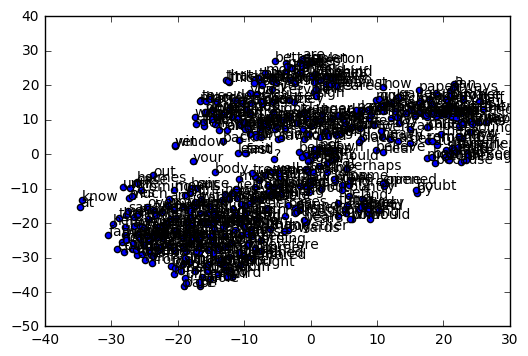

In [8]:
embed_2d, word_list = word_vector_nce.project_2d(200, 700)
reverse_dict = word_vector_nce.get_reverse_dict()
# minx, maxx, miny, maxy = (-10, 0, 20, 30)
# plt.ylim(miny, maxy)
# plt.xlim(minx, maxx)
plt.scatter(embed_2d[:,0], embed_2d[:,1])
for i in range(500):
    plt.text(embed_2d[i,0], embed_2d[i,1], reverse_dict[i], clip_on=True)
plt.show()

In [9]:
word_vector_embed.analogy('gentleman', 'lady', 'lord', 5)

['lord', 'lady', 'vision', 'annoyance', 'nursery']

In [10]:
x_predict = x[:100,:]
y_hat = model.predict(x_predict, 30)
np.sum(y_hat[0]-y[:100,0]==0)

In [12]:
np.sum(y_hat[0]-y[:100,0]==0)

27

In [13]:
y[:100,0]

array([ 244,  240, 1494,    4,   52,   78, 1080,    0,  147,  273,    3,
         41,   12,   24,   11,    7,    3,   13, 2597,   13,   13, 1018,
          5, 1810,   13,  492,   47,    1,  110,    0,    3,   39, 7429,
        551,    8, 1333, 2062,   11,    4, 9178,   24,  375,   20,   17,
          0,   41, 2278,  114,   14,    8,   95, 3383,   15,    5,   10,
        101,   69,    7,    8,  246,  114,    8,   78,    2,   10,   24,
          9,    4,    3,   18,    7,   11,  174,   22,    4,   79,    7,
       5834,  290,  315,   20,   20,   10,    1,   97, 1023,  197,  703,
        204, 3923,   23,   10, 2413,  159, 2051,   11,  155,   17,  754,
       3021], dtype=int32)